# Dataset Exploring and Environment setup

### Explore data and find out size of the dataset, number of columns, type of each column.

In [2]:
import pandas

dataset = pandas.read_csv("train.csv")
df = pandas.DataFrame(dataset)   # df = dataframe

print("The size of dataset is {}.".format(df.size))
print("There are {} rows in dataset.".format(df.shape[0]))
print("There are {} columns in dataset.\n".format(df.shape[1]))

i = 0
for col in df.columns:
    print("Column {}:".format(i))
    print("Name: {} Type: {} Example: {}".format('"' + col + '",', df.dtypes[i], df[col][0]))
    i += 1


The size of dataset is 128856.
There are 10738 rows in dataset.
There are 12 columns in dataset.

Column 0:
Name: "customer_id", Type: object Example: csid_1
Column 1:
Name: "customer_visit_score", Type: float64 Example: 13.168424934582866
Column 2:
Name: "customer_product_search_score", Type: float64 Example: 9.447661690795815
Column 3:
Name: "customer_ctr_score", Type: float64 Example: -0.0702026428938979
Column 4:
Name: "customer_stay_score", Type: float64 Example: -0.1395408792861613
Column 5:
Name: "customer_frequency_score", Type: float64 Example: 0.4369560308164117
Column 6:
Name: "customer_product_variation_score", Type: float64 Example: 4.705760939212163
Column 7:
Name: "customer_order_score", Type: float64 Example: 2.537985051869976
Column 8:
Name: "customer_affinity_score", Type: float64 Example: 7.959503221378464
Column 9:
Name: "customer_active_segment", Type: object Example: C
Column 10:
Name: "X1", Type: object Example: F
Column 11:
Name: "customer_category", Type: int64

# Data Visualization

### For every categorical variable build a barplot, for every numerical value build boxplot.

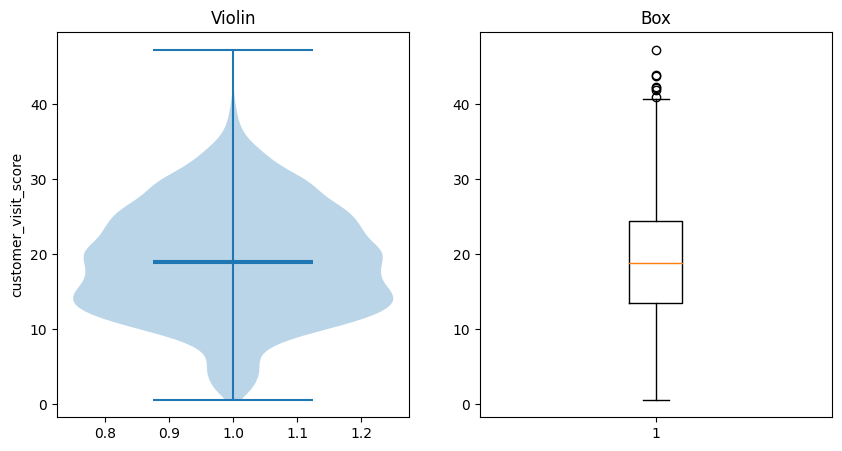

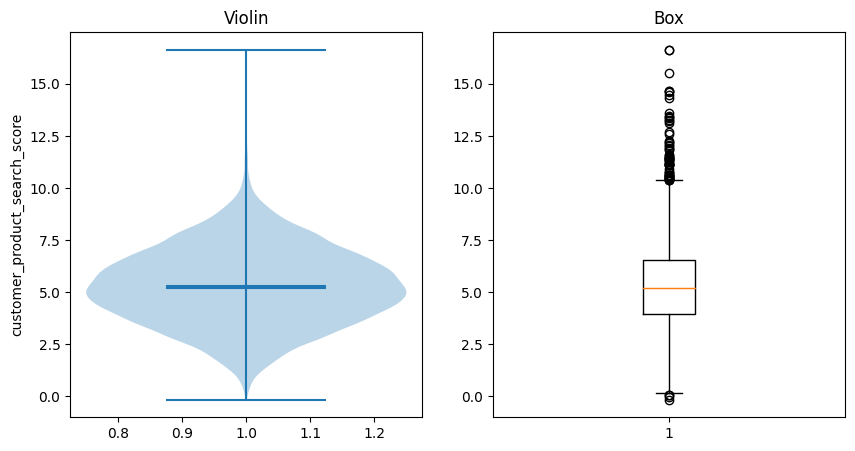

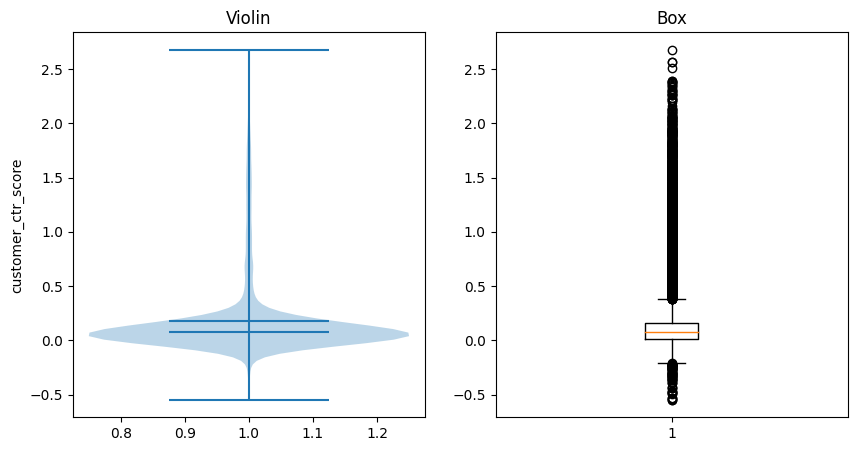

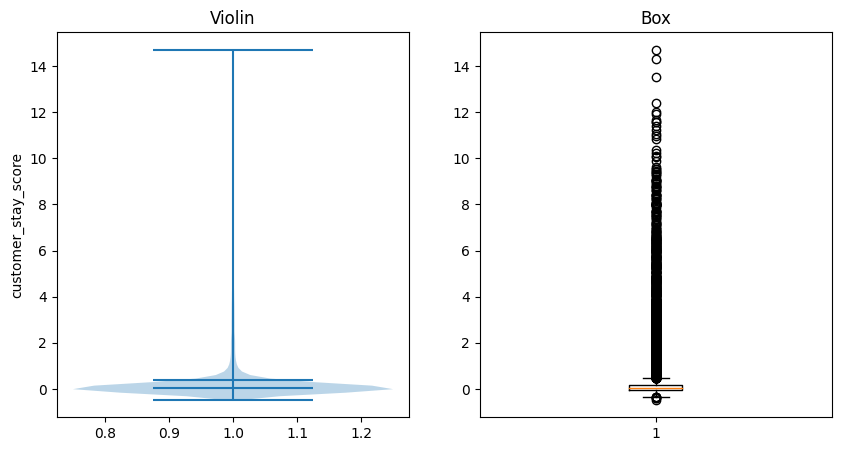

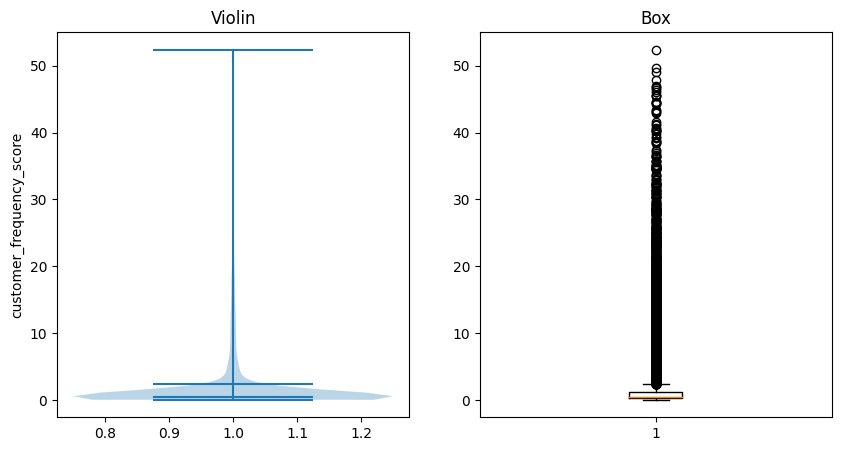

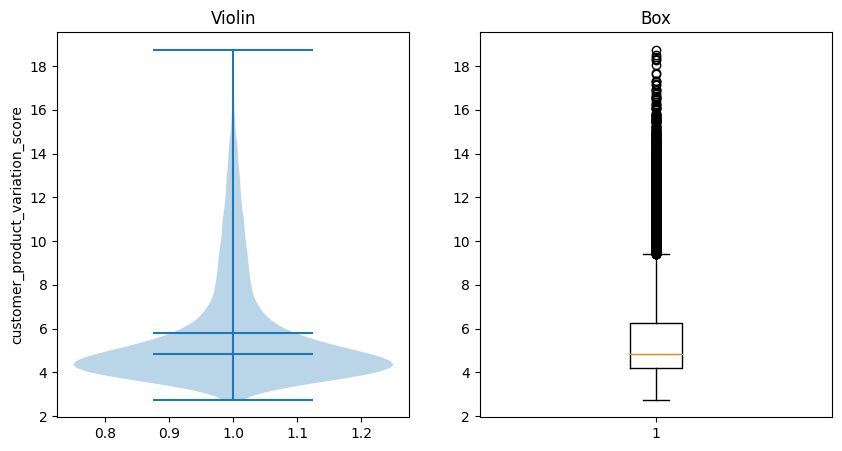

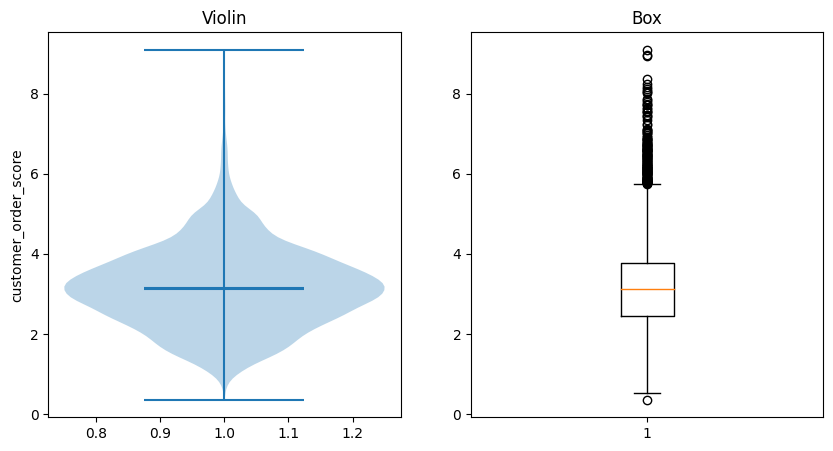

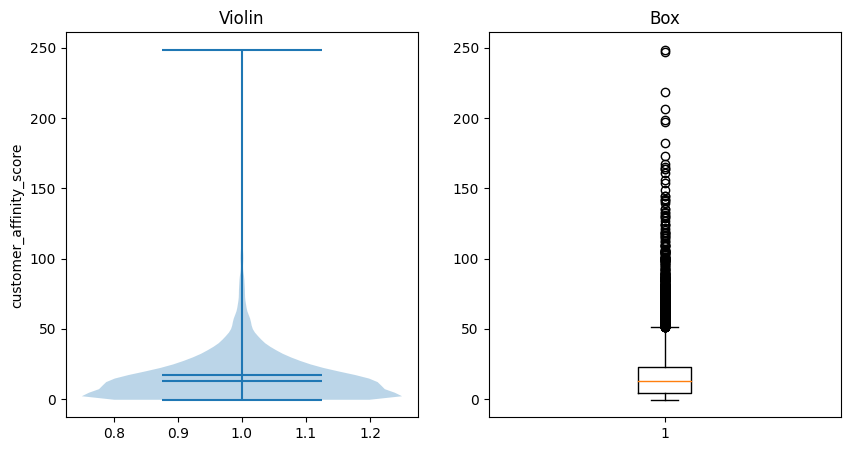

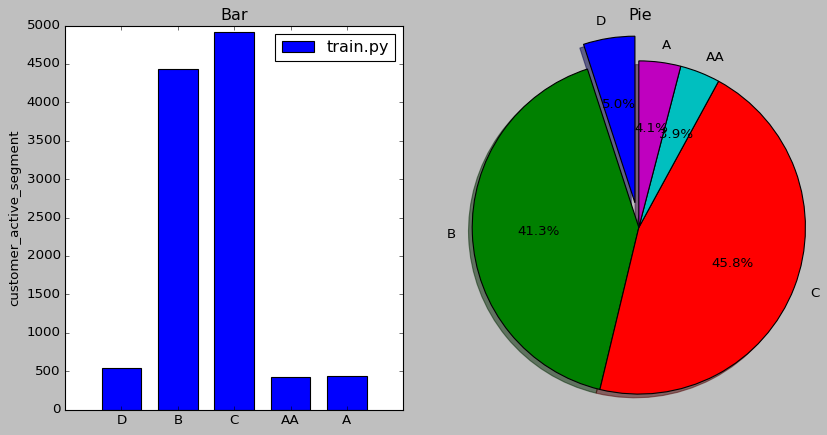

Frequency:
C     4919
B     4430
D      536
A      435
AA     418
Name: customer_active_segment, dtype: int64




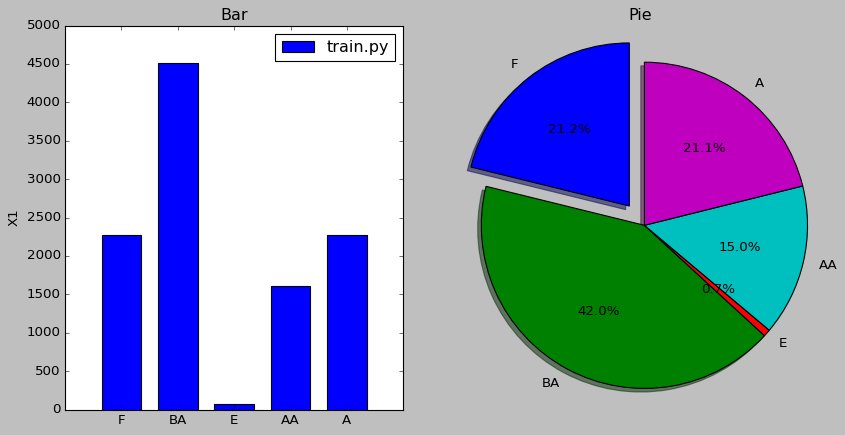

Frequency:
BA    4511
F     2272
A     2268
AA    1611
E       76
Name: X1, dtype: int64




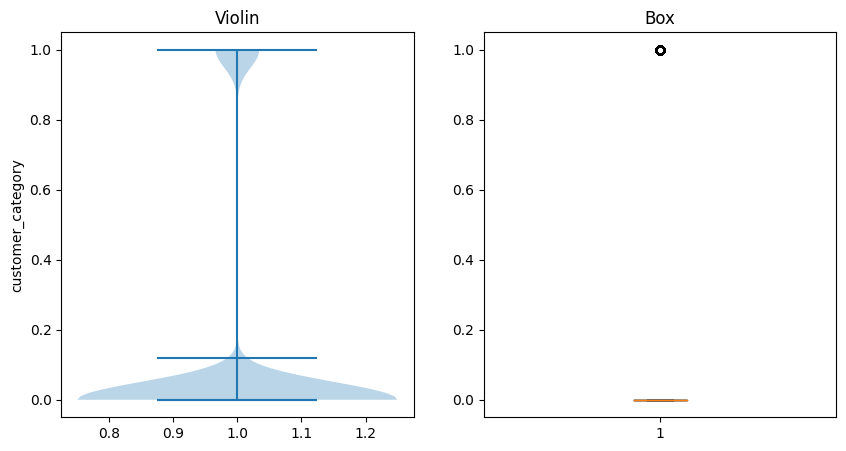

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


num_cols = []
cat_cols = []
j = 1
for col in df.columns[1:]:
    data = df[col]
    
    if df.dtypes[j] != 'object':
        num_cols.append(col)
        
        plt.style.use('default')
        data = data.fillna(np.random.choice(data.unique()))
       
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

        # violin plot
        axes[0].violinplot(data,
                           showmeans=True,
                           showmedians=True)
        axes[0].set_title('Violin')
        axes[0].set_ylabel(col)

        # box plot
        axes[1].boxplot(data)
        axes[1].set_title('Box')
        
        plt.show()
            
    else:
        cat_cols.append(col)
        plt.style.use('classic')
        data = data.fillna(np.random.choice(data.unique()))
        x = set(data)
        
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
        
        # bar plot
        y = []
        for i in x:
            y.append(list(data).count(i))
            
        N = len(x)
        ind = np.arange(N)
        width = 0.7

        axes[0].bar(ind, y, width)
        axes[0].set_ylabel(col)
        axes[0].set_title('Bar')
        axes[0].set_xticks(ind)
        axes[0].set_xticklabels(x)
        axes[0].set_yticks(np.arange(0, 5500, 500))
        axes[0].legend(handles=[mpatches.Patch(label='train.py')])   
        
        # pie plot
        labels = list(x)
        y = []
        for i in x:
            y.append(list(data).count(i))
        
        sizes = []
        for i in y:
            sizes.append(i / sum(y) * 100)
    
        explode = [0.15] + [0 for i in range(len(x) - 1)]

        axes[1].set_title('Pie')
        axes[1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        axes[1].axis('equal') 

        plt.show()
        print("Frequency:")
        print(data.value_counts())
        
    print("\n")
    j += 1

### Normalize data. Calculate statistics (mean, standard deviation, correlation matrix, frequency) where possible.

In [4]:
normalized_df = df.copy()
normalized_df[num_cols] = normalized_df[num_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

normalized_df

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,C,F,0.0
1,csid_2,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,C,A,0.0
2,csid_3,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,C,BA,0.0
3,csid_4,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,AA,F,0.0
4,csid_5,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,C,AA,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10733,csid_10734,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,C,BA,0.0
10734,csid_10735,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,C,BA,0.0
10735,csid_10736,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,A,BA,0.0
10736,csid_10737,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,0.351176,B,AA,0.0


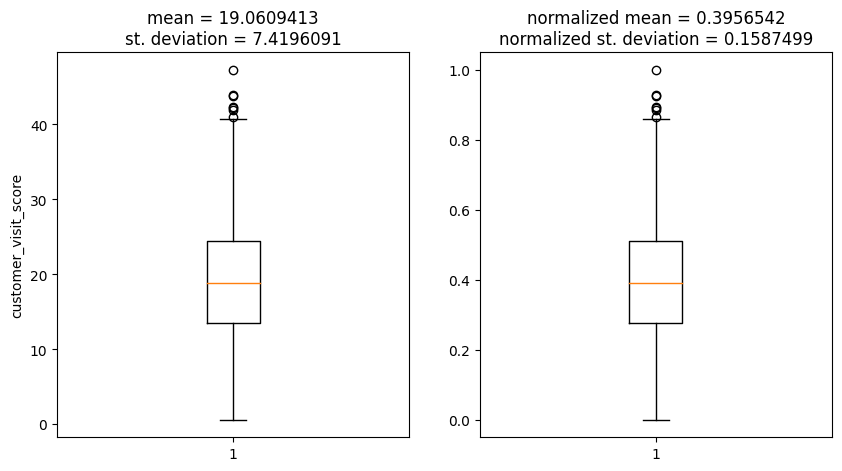

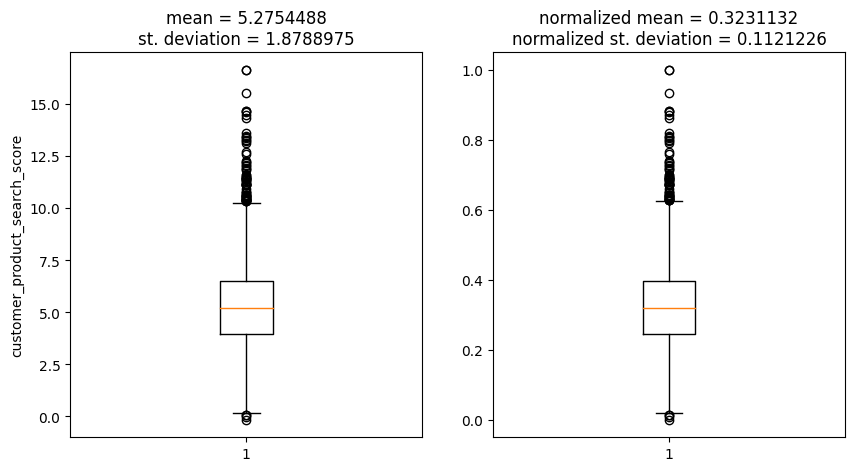

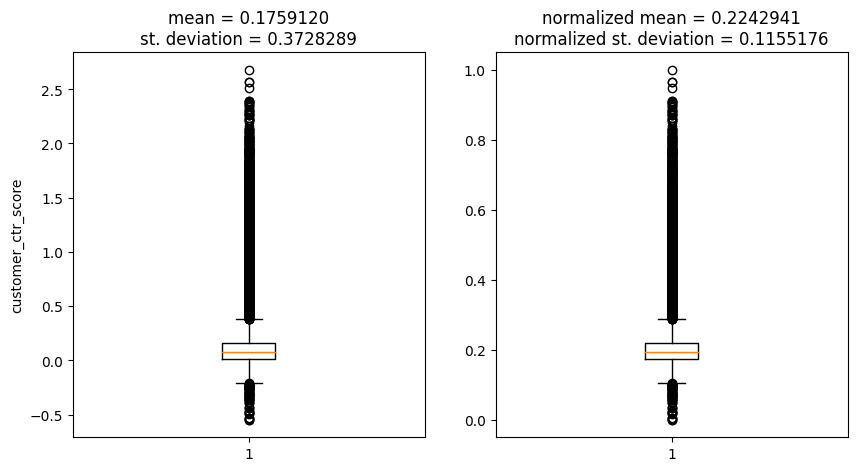

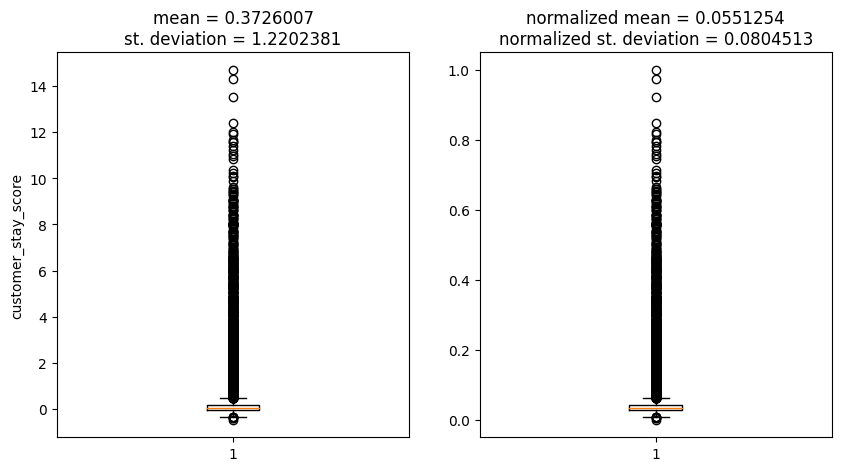

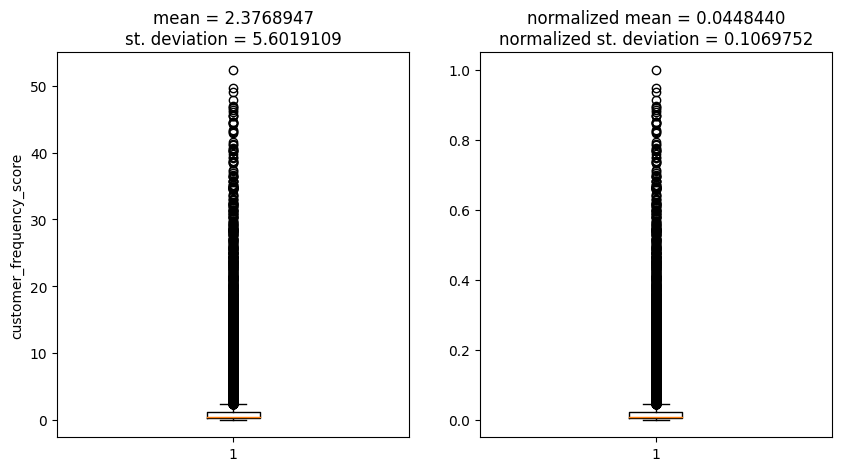

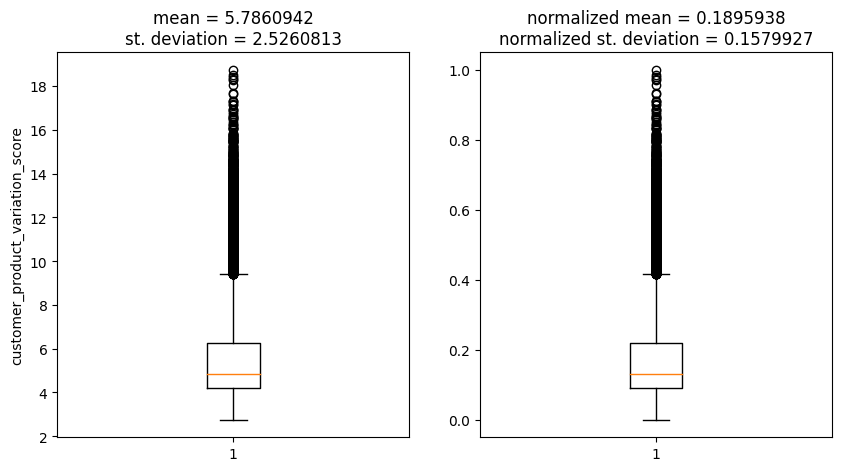

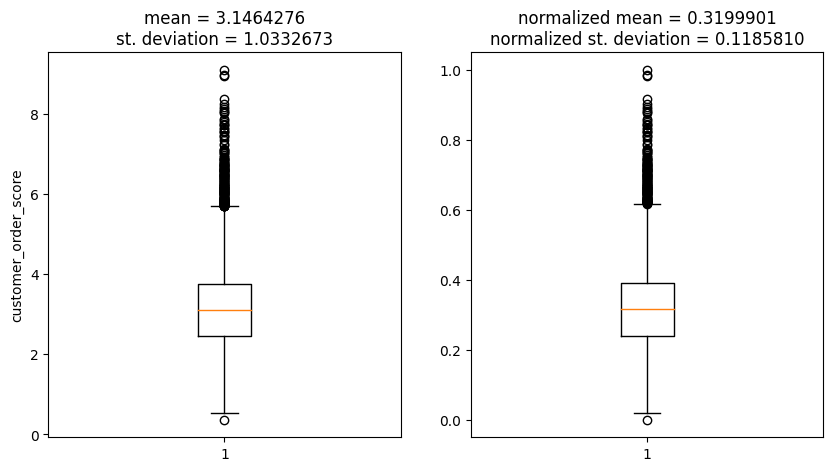

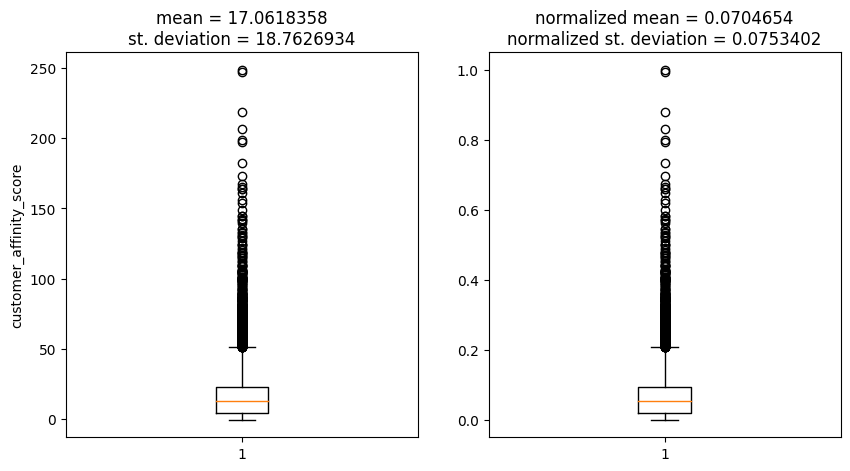

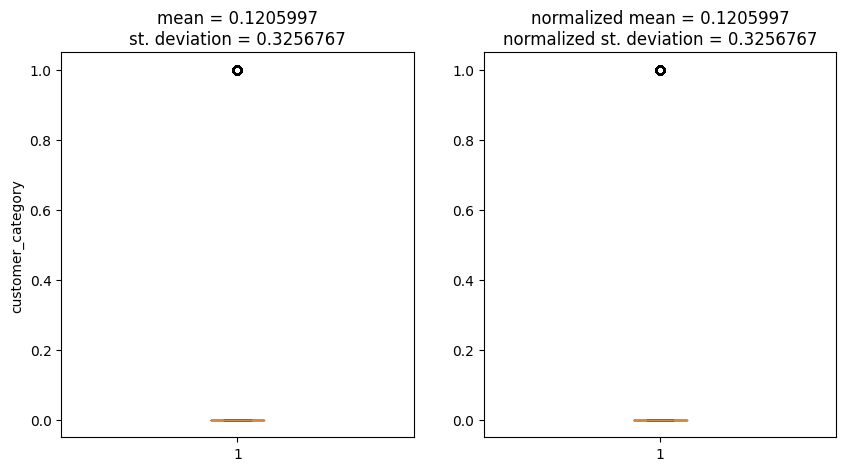

In [5]:
j = 1
for col in df.columns[1:]:
    data1 = df[col]
    data2 = normalized_df[col]
    
    if df.dtypes[j] != 'object':
        
        plt.style.use('default')
        data1 = data1.fillna(np.random.choice(data1.unique()))
        data2 = data2.fillna(np.random.choice(data2.unique()))

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
        
        # plot box plot
        axes[0].boxplot(data1)
        axes[0].set_ylabel(col)
        axes[0].set_title('mean = {:.7f}\nst. deviation = {:.7f}'.format(data1.mean(), data1.std()))

        axes[1].boxplot(data2)
        axes[1].set_title('normalized mean = {:.7f}\nnormalized st. deviation = {:.7f}'.format(data2.mean(), data2.std()))
        
        plt.show()

    print("\n")
    j += 1

In [7]:
cor_matr = normalized_df.corr()
cor_matr

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
customer_visit_score,1.000000,0.274672,-0.569430,-0.474176,-0.209270,-0.220016,0.170497,0.118925,-0.449654
customer_product_search_score,0.274672,1.000000,-0.415910,-0.414855,-0.023031,-0.066274,0.051181,0.044181,-0.300862
customer_ctr_score,-0.569430,-0.415910,1.000000,0.909248,0.419461,0.448071,-0.342506,-0.232876,0.794445
customer_stay_score,-0.474176,-0.414855,0.909248,1.000000,0.400374,0.406516,-0.311451,-0.210629,0.679366
customer_frequency_score,-0.209270,-0.023031,0.419461,0.400374,1.000000,0.702688,-0.533142,-0.326201,0.389465
customer_product_variation_score,-0.220016,-0.066274,0.448071,0.406516,0.702688,1.000000,-0.694476,-0.525783,0.493958
customer_order_score,0.170497,0.051181,-0.342506,-0.311451,-0.533142,-0.694476,1.000000,0.763861,-0.385278
customer_affinity_score,0.118925,0.044181,-0.232876,-0.210629,-0.326201,-0.525783,0.763861,1.000000,-0.274105
customer_category,-0.449654,-0.300862,0.794445,0.679366,0.389465,0.493958,-0.385278,-0.274105,1.000000


### Build heat map to see how features correlate with the target value.

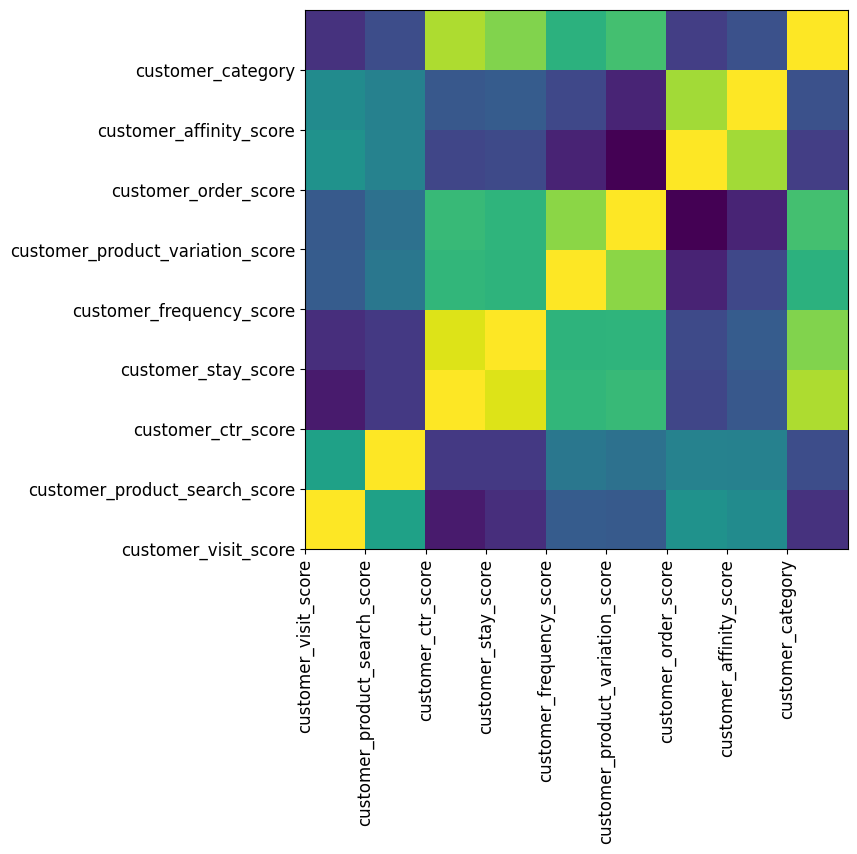

In [8]:
plt.figure(figsize=(7, 7))
plt.pcolor(cor_matr)
plt.yticks(ticks=range(9), labels= num_cols, fontsize=12)
plt.xticks(ticks=range(9), labels= num_cols, rotation=90, fontsize=12)
plt.show()

### Encode all categorical features as integers so that you can use them during model training. 

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

normalized_df[cat_cols] = normalized_df[cat_cols].apply(lambda x: le.fit_transform(x))
normalized_df = normalized_df.drop(["customer_id"], axis=1)
normalized_df

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,3,4,0.0
1,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,3,0,0.0
2,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,3,2,0.0
3,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,1,4,0.0
4,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10733,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,3,2,0.0
10734,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,3,2,0.0
10735,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,0,2,0.0
10736,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,0.351176,2,1,0.0
